# Convolutional Neural Network

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
from keras.utils.vis_utils import plot_model

In [2]:
dataset, info = tfds.load(name='CatsVsDogs', with_info=True, as_supervised=True)

In [3]:
examples = tfds.as_dataframe(dataset['train'].take(5), info)

,image,label
0,,1 (dog)
1,,1 (dog)
2,,1 (dog)
3,,0 (cat)
4,,1 (dog)

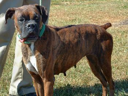
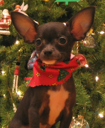
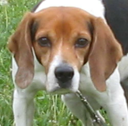
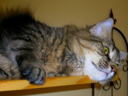
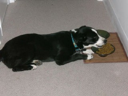

In [4]:
examples

In [5]:
train_size = int(len(dataset['train']) * 0.85)
test_size = len(dataset['train']) - train_size
validation_size = int(train_size * 0.1) 

In [6]:
def resize_scale(image,label):
    image = tf.image.resize(image, (64, 64))
    image = tf.cast(image, tf.float32)
    image /= 255.
    return image, label

In [7]:
dataset = dataset['train'].map(resize_scale)

In [8]:
dataset = dataset.shuffle(500)

In [9]:
test = dataset.take(test_size)
dataset = dataset.skip(test_size)

In [10]:
def augment(image, label):
    image = tf.image.random_brightness(image, max_delta = 0.2)
    image = tf.image.random_contrast(image, lower = 0.1, upper = 0.4)
    image = tf.image.random_flip_left_right(image)
    return image, label

In [11]:
dataset = dataset.map(augment)

In [12]:
validation = dataset.take(validation_size)

train = dataset.skip(validation_size)

In [13]:
batch_size = 64

In [14]:
train = train.batch(batch_size)
validation = validation.batch(validation_size)
test = test.batch(test_size)

In [15]:
cnn = tf.keras.models.Sequential([tf.keras.layers.Convolution2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (64, 64, 3)),
                                  tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
                                  tf.keras.layers.Convolution2D(filters = 32, kernel_size = (3, 3), activation = 'relu'),
                                  tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(100, activation = 'relu'),
                                  tf.keras.layers.Dense(1, activation = 'sigmoid')
                                  ], name = 'cnn_catsvdogs'
                                 )

In [16]:
cnn.summary()

Model: "cnn_catsvdogs"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 100)             

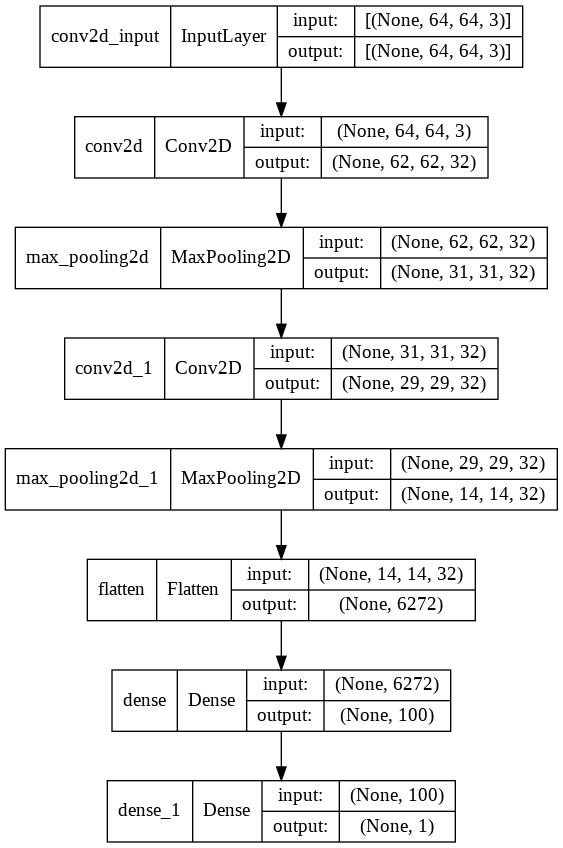

In [17]:
plot_model(cnn, show_shapes = True)

In [18]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
validation_inputs, validation_targets = next(iter(validation))

In [20]:
# cnn.fit(train, epochs = 50, validation_data = (validation_inputs, validation_targets), verbose = 1)

In [21]:
# cnn.save_weights('cnn_model_catsvdogs.h5')

In [22]:
cnn.load_weights('cnn_model_catsvdogs.h5')

In [23]:
test_loss, test_accuracy = cnn.evaluate(test)
print(f'Test Loss = {test_loss}')
print(f'Test Acurracy = {test_accuracy}')

1/1 [==============================] - 7s 7s/step - loss: 1.1056 - accuracy: 0.7332
Test Loss = 1.1055629253387451
Test Acurracy = 0.7332378029823303


<hr>